In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('kaggle_data/ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df[['category', 'main_category']].nunique()

category         159
main_category     15
dtype: int64

In [6]:
df['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [7]:
success_rate = df['state'].value_counts() / len(df['state']) * 100
success_rate

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64

In [8]:
print('before: ', df.shape)
df = df[(df['state'] == 'successful') | (df['state'] == 'failed')]
df['state'] = df['state'].map({
    'successful': 1,
    'failed': 0,
})
print('after: ', df.shape)

before:  (378661, 15)
after:  (331675, 15)


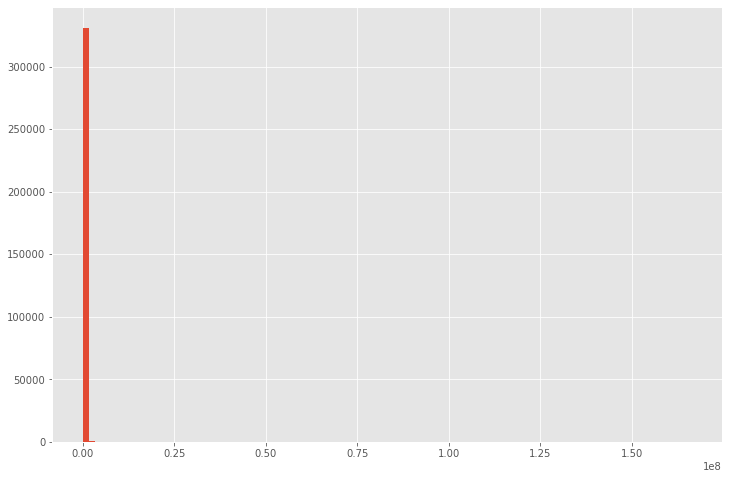

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(df['usd_goal_real'], bins=100)
plt.show()

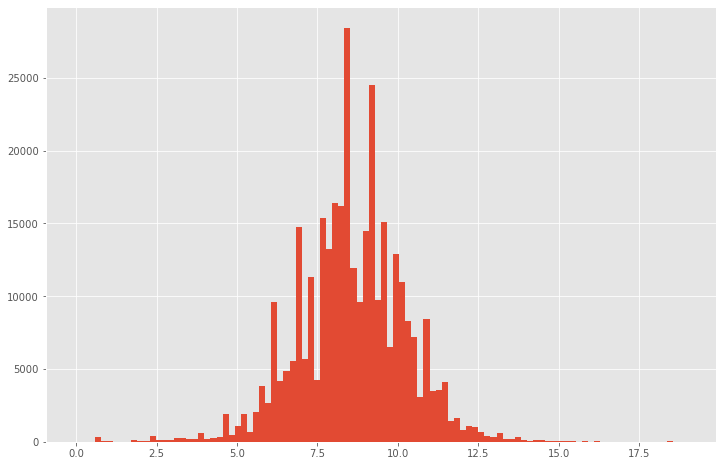

In [10]:
df['usd_goal_real'] = np.log1p(df['usd_goal_real'])
plt.figure(figsize=(12, 8))
plt.hist(df['usd_goal_real'], bins=100)
plt.show()

In [11]:
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d %H:%M:%S')
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')

df['duration'] = (df['deadline'] - df['launched']).dt.days

df['quarter']= df['launched'].dt.quarter
df['month']= df['launched'].dt.month
df['year']= df['launched'].dt.year
df['dayofweek']= df['launched'].dt.dayofweek

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,quarter,month,year,dayofweek
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,7.336253,58,3,8,2015,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,10.308986,59,3,9,2017,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,10.714440,44,1,1,2013,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,8.517393,29,1,3,2012,5
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,10.819798,34,1,2,2016,4


In [12]:
df = df.drop(columns=['ID', 'deadline', 'goal', 'launched', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real'])
df.head()

,name,category,main_category,currency,state,country,usd_goal_real,duration,quarter,month,year,dayofweek
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,7.336253,58,3,8,2015,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,10.308986,59,3,9,2017,5
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,10.714440,44,1,1,2013,5
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,8.517393,29,1,3,2012,5
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,4


In [13]:
df['name_len'] = df['name'].str.len()
df['num_words'] = df['name'].apply(lambda x: len(str(x).split(' ')))
df.drop(columns=['name'], inplace=True)
df.head()

,category,main_category,currency,state,country,usd_goal_real,duration,quarter,month,year,dayofweek,name_len,num_words
0,Poetry,Publishing,GBP,0,GB,7.336253,58,3,8,2015,1,31.0,6
1,Narrative Film,Film & Video,USD,0,US,10.308986,59,3,9,2017,5,45.0,8
2,Narrative Film,Film & Video,USD,0,US,10.714440,44,1,1,2013,5,14.0,3
3,Music,Music,USD,0,US,8.517393,29,1,3,2012,5,49.0,7
5,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,4,20.0,3


In [14]:
df.isnull().sum()

category         0
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
duration         0
quarter          0
month            0
year             0
dayofweek        0
name_len         3
num_words        0
dtype: int64

In [15]:
df['name_len'] = df['name_len'].fillna(0)

In [16]:
df.isnull().sum()

category         0
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
duration         0
quarter          0
month            0
year             0
dayofweek        0
name_len         0
num_words        0
dtype: int64

In [17]:
df = pd.get_dummies(df, ['category', 'main_category', 'currency', 'currency'])
df.head()

,state,usd_goal_real,duration,quarter,month,year,dayofweek,name_len,num_words,category_3D Printing,...,currency_JP,currency_LU,currency_MX,"currency_N,0""",currency_NL,currency_NO,currency_NZ,currency_SE,currency_SG,currency_US
0,0,7.336253,58,3,8,2015,1,31.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10.308986,59,3,9,2017,5,45.0,8,0,...,0,0,0,0,0,0,0,0,0,1
2,0,10.714440,44,1,1,2013,5,14.0,3,0,...,0,0,0,0,0,0,0,0,0,1
3,0,8.517393,29,1,3,2012,5,49.0,7,0,...,0,0,0,0,0,0,0,0,0,1
5,1,10.819798,34,1,2,2016,4,20.0,3,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(columns=['state'])
y = df['state']

X.shape, y.shape

((331675, 219), (331675,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(265340, 219) (265340,)
(66335, 219) (66335,)


In [21]:
params = {
    'verbosity': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'exact',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'predictor': 'cpu_predictor'
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=5,
    evals=[(dtest, 'test')]
)

[0]	test-logloss:0.67975
[1]	test-logloss:0.66871
[2]	test-logloss:0.65942
[3]	test-logloss:0.65163
[4]	test-logloss:0.64484
[5]	test-logloss:0.63918
[6]	test-logloss:0.63405
[7]	test-logloss:0.62972
[8]	test-logloss:0.62564
[9]	test-logloss:0.62196
[10]	test-logloss:0.61861
[11]	test-logloss:0.61566
[12]	test-logloss:0.61283
[13]	test-logloss:0.61048
[14]	test-logloss:0.60828
[15]	test-logloss:0.60609
[16]	test-logloss:0.60458
[17]	test-logloss:0.60287
[18]	test-logloss:0.60127
[19]	test-logloss:0.60005
[20]	test-logloss:0.59877
[21]	test-logloss:0.59747
[22]	test-logloss:0.59616
[23]	test-logloss:0.59510
[24]	test-logloss:0.59402
[25]	test-logloss:0.59321
[26]	test-logloss:0.59218
[27]	test-logloss:0.59116
[28]	test-logloss:0.59051
[29]	test-logloss:0.58972
[30]	test-logloss:0.58912
[31]	test-logloss:0.58831
[32]	test-logloss:0.58773
[33]	test-logloss:0.58703
[34]	test-logloss:0.58655
[35]	test-logloss:0.58607
[36]	test-logloss:0.58552
[37]	test-logloss:0.58505
[38]	test-logloss:0.58

In [22]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)
prediction = [round(pred) for pred in y_pred]

acc = accuracy_score(y_test, prediction)
print(round(acc * 100, 2))

69.76


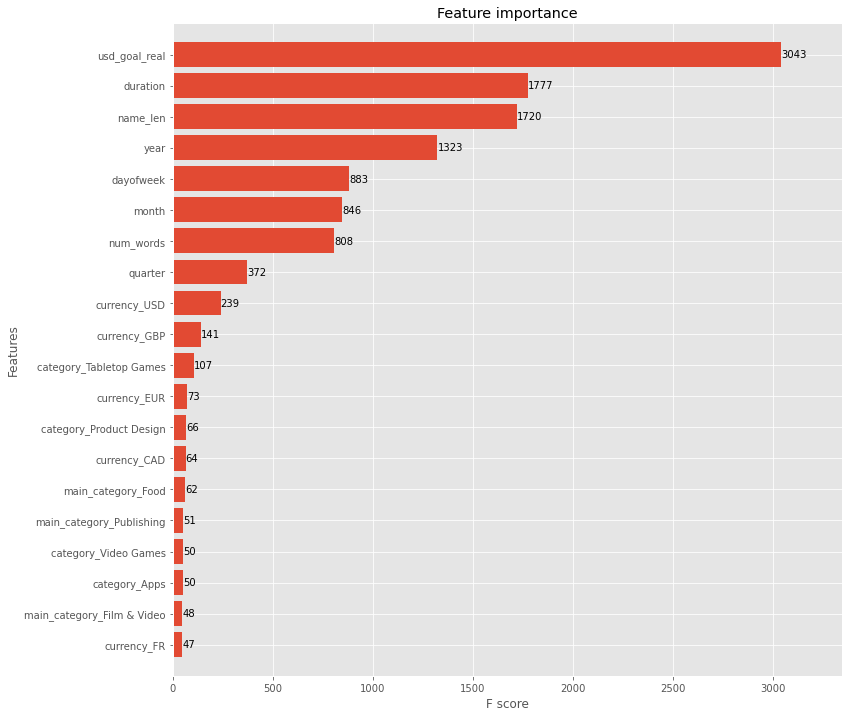

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(model, max_num_features=20, height=0.8, ax=ax)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [27]:
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def predict(self, x):
        return self.clf.predict(x) 
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)

In [28]:
rfc_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True, 
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1
}

etc_params = {
    'n_jobs': -1,
    'n_estimators':500,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 1
}

ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

gbc_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 1
}

In [29]:
rfc = SklearnHelper(RandomForestClassifier, seed=0, params=rfc_params).fit(X_train, y_train)
etc = SklearnHelper(ExtraTreesClassifier, seed=0, params=etc_params).fit(X_train, y_train)
ada = SklearnHelper(AdaBoostClassifier, seed=0, params=ada_params).fit(X_train, y_train)
gbc = SklearnHelper(GradientBoostingClassifier, seed=0, params=gbc_params).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   33.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   53.8s finished


      Iter       Train Loss   Remaining Time 
         1           1.3311           22.61m
         2           1.3160           22.89m
         3           1.3029           23.38m
         4           1.2917           23.05m
         5           1.2813           22.82m
         6           1.2728           22.73m
         7           1.2650           22.59m
         8           1.2580           22.54m
         9           1.2521           22.30m
        10           1.2461           22.37m
        20           1.2088           21.07m
        30           1.1883           20.27m
        40           1.1749           19.60m
        50           1.1663           18.91m
        60           1.1591           18.25m
        70           1.1538           17.68m
        80           1.1496           17.13m
        90           1.1461           16.77m
       100           1.1421           16.19m
       200           1.1227           11.77m
       300           1.1118            8.04m
       40

In [30]:
rfc_pred = rfc.predict_proba(X_train)
etc_pred = etc.predict_proba(X_train)
ada_pred = ada.predict_proba(X_train)
gbc_pred = gbc.predict_proba(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    3.9s finished


In [31]:
rfc_pred

array([[0.49069168, 0.50930832],
       [0.58977402, 0.41022598],
       [0.70534683, 0.29465317],
       ...,
       [0.57845747, 0.42154253],
       [0.6458248 , 0.3541752 ],
       [0.64511941, 0.35488059]])

In [33]:
preds_train = pd.DataFrame({
    'rfc_pred': rfc_pred[:, 1],
    'etc_pred': etc_pred[:, 1],
    'ada_pred': ada_pred[:, 1],
    'gbc_pred': gbc_pred[:, 1]
})

preds_train.head()

,rfc_pred,etc_pred,ada_pred,gbc_pred
0,0.509308,0.540601,0.500736,0.779683
1,0.410226,0.405980,0.499536,0.326807
2,0.294653,0.356279,0.498241,0.044276
3,0.456229,0.457445,0.500262,0.612225
4,0.304202,0.303696,0.498580,0.132501


In [34]:
y_train

72694     1
121748    0
118735    0
225760    1
323097    0
         ..
139890    0
347171    0
173937    0
134626    0
348958    0
Name: state, Length: 265340, dtype: int64

In [35]:
rfc_pred_test = rfc.predict_proba(X_test)
etc_pred_test = etc.predict_proba(X_test)
ada_pred_test = ada.predict_proba(X_test)
gbc_pred_test = gbc.predict_proba(X_test)

preds_test = pd.DataFrame({
    'rfc_pred': rfc_pred_test[:, 1],
    'etc_pred': etc_pred_test[:, 1],
    'ada_pred': ada_pred_test[:, 1],
    'gbc_pred': gbc_pred_test[:, 1]
})
preds_test.head()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.7s finished


,rfc_pred,etc_pred,ada_pred,gbc_pred
0,0.411190,0.401231,0.500416,0.620315
1,0.428314,0.408487,0.499715,0.412509
2,0.442547,0.462975,0.500071,0.437666
3,0.414085,0.398738,0.500051,0.544812
4,0.402922,0.390018,0.499890,0.385651


In [36]:
params = {
    'verbosity': 1,
    'max_depth': 2,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'exact',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'predictor': 'cpu_predictor'
}

dtrain = xgb.DMatrix(preds_train, label=y_train)
dtest = xgb.DMatrix(preds_test, label=y_test)
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=5,
    evals=[(dtest, 'test')]
)

[0]	test-logloss:0.67164
[1]	test-logloss:0.65424
[2]	test-logloss:0.63992
[3]	test-logloss:0.62785
[4]	test-logloss:0.61788
[5]	test-logloss:0.60950
[6]	test-logloss:0.60238
[7]	test-logloss:0.59649
[8]	test-logloss:0.59153
[9]	test-logloss:0.58727
[10]	test-logloss:0.58365
[11]	test-logloss:0.58065
[12]	test-logloss:0.57807
[13]	test-logloss:0.57590
[14]	test-logloss:0.57398
[15]	test-logloss:0.57238
[16]	test-logloss:0.57110
[17]	test-logloss:0.57000
[18]	test-logloss:0.56900
[19]	test-logloss:0.56815
[20]	test-logloss:0.56746
[21]	test-logloss:0.56684
[22]	test-logloss:0.56636
[23]	test-logloss:0.56590
[24]	test-logloss:0.56549
[25]	test-logloss:0.56520
[26]	test-logloss:0.56491
[27]	test-logloss:0.56469
[28]	test-logloss:0.56448
[29]	test-logloss:0.56430
[30]	test-logloss:0.56420
[31]	test-logloss:0.56402
[32]	test-logloss:0.56396
[33]	test-logloss:0.56393
[34]	test-logloss:0.56382
[35]	test-logloss:0.56377
[36]	test-logloss:0.56371
[37]	test-logloss:0.56375
[38]	test-logloss:0.56

In [37]:
y_pred = model.predict(xgb.DMatrix(preds_test), ntree_limit=model.best_ntree_limit)
prediction = [round(pred) for pred in y_pred]

acc = accuracy_score(y_test, prediction)
print(round(acc * 100, 2))

69.8
